In [21]:
import pandas as pd
baseball = pd.read_csv("baseballdata.csv")


In [34]:
baseball2 = baseball.dropna()
baseball2

,id,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,R,RA,Attendance,BatAge,PAge,X.Bat,X.P,Top.Player,Managers,current
5,6,6,2011,Arizona Diamondbacks,NL West,162,94,68,0,0.580,...,731,662,2105432.0,28.2,27.4,51,25,J.Upton (6.1),K.Gibson (94-68),Arizona Diamondbacks
9,10,10,2007,Arizona Diamondbacks,NL West,162,90,72,0,0.556,...,712,732,2325249.0,26.6,28.2,47,26,B.Webb (5.9),B.Melvin (90-72),Arizona Diamondbacks
14,15,15,2002,Arizona Diamondbacks,NL West,162,98,64,0,0.605,...,819,674,3198977.0,31.7,31.7,42,20,R.Johnson (10.7),B.Brenly (98-64),Arizona Diamondbacks
15,16,16,2001,Arizona Diamondbacks,NL West,162,92,70,0,0.568,...,818,677,2736451.0,31.9,30.9,47,22,R.Johnson (9.4),B.Brenly (92-70),Arizona Diamondbacks
17,18,18,1999,Arizona Diamondbacks,NL West,162,100,62,0,0.617,...,908,676,3019654.0,30.0,30.6,43,20,R.Johnson (8.8),B.Showalter (100-62),Arizona Diamondbacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,2538,32,1985,Toronto Blue Jays,AL East,161,99,62,0,0.615,...,759,588,2468925.0,27.8,28.9,40,15,D.Stieb (6.9),B.Cox (99-62),Toronto Blue Jays
2546,2547,1,2016,Washington Nationals,NL East,162,95,67,0,0.586,...,763,612,2481938.0,28.8,29.1,43,24,M.Scherzer (6.3),D.Baker (95-67),Washington Nationals
2548,2549,3,2014,Washington Nationals,NL East,162,96,66,0,0.593,...,686,555,2579389.0,28.8,28.3,40,18,A.Rendon (6.6),M.Williams (96-66),Washington Nationals
2550,2551,5,2012,Washington Nationals,NL East,162,98,64,0,0.605,...,731,594,2370794.0,27.2,27.0,43,19,J.Zimmermann (5.3),D.Johnson (98-64),Washington Nationals


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
X = baseball2["W.L."]
y = baseball2["Attendance"]

In [37]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
model.fit(X_train, y_train)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-9043967.67594848]]
y-axis intercept:  [7517816.18998402]


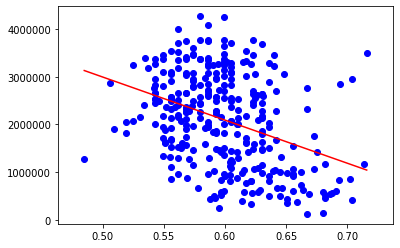

In [48]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X_train, y_train, c='blue')
x_train_min = np.array([[X_train.min()]])
x_train_max = np.array([[X_train.max()]])
y_min = model.predict(x_train_min)
y_max = model.predict(x_train_max)
plt.plot([x_train_min[0], x_train_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_train)

# Score the prediction with mse and r2
mse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 826159624524.5852
R-squared (R2 ): 0.13748301531418816
